For this project I will be exploring a public available data from [LendingClub.com](https://www.lendingclub.com/).
LendingClub is a peer to peer lending platform connecting people who need money (the borrower) with people who have the money (investors). As an investor I would want to invest in people who sowed a profile of having a high probability of paying me back. I am going to create a model that will help me to predict this.
I am going to use [data](../inputs/loan_data.csv) from 2007 to 2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
I already saved a dataset with NaN treated.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\anaconda\envs\DataSciense\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#Read the data

In [2]:
loans = pd.read_csv("inputs/loan_data.csv")

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#Exploratory Data Analysis

I will, first create some histograms of FICO distributions.

A FICO score is a type of credit score created by the Fair Isaac Corporation. Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit. FICO scores take into account various factors in five areas to determine credit worthiness: payment history, current level of indebtedness, types of credit used, length of credit history and new credit accounts.

Read more: FICO Score http://www.investopedia.com/terms/f/ficoscore.asp#ixzz4lBW0yxF0 

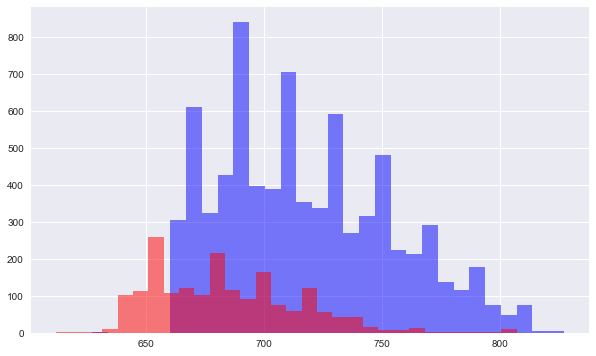

In [6]:
plt.figure(figsize = (10, 6)) #Canvas
loans[loans["credit.policy"]==1]["fico"].hist(alpha = 0.5, color = "blue", bins = 30, label = "Credit Policy 1")
loans[loans["credit.policy"]==0]["fico"].hist(alpha = 0.5, color = "red", bins = 30, label = "Credit Policy 0")

Now, I will do similar for `not.fully.paid`column

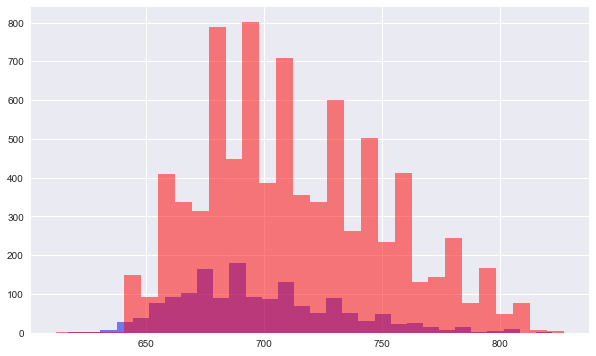

In [7]:
plt.figure(figsize = (10, 6)) #Canvas
loans[loans["not.fully.paid"]==1]["fico"].hist(alpha = 0.5, color = "blue", bins = 30, label = "Not fully paid 1")
loans[loans["not.fully.paid"]==0]["fico"].hist(alpha = 0.5, color = "red", bins = 30, label = "Not fully paid 0")

Let's talk about countplots

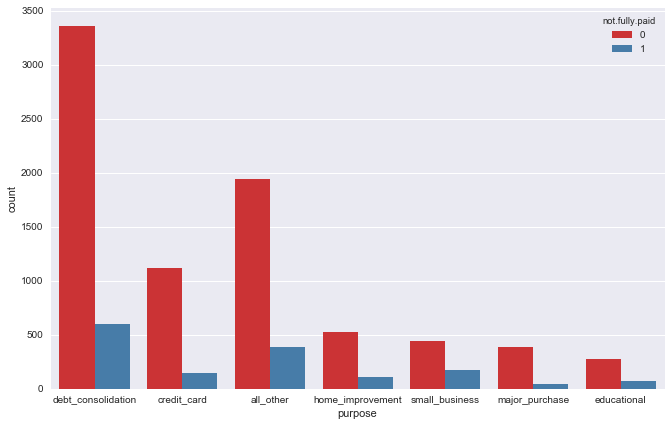

In [8]:
plt.figure(figsize = (11, 7))
sns.countplot(x = "purpose", hue = "not.fully.paid", data = loans, palette = "Set1")

Let's see the trend between FICO score and interest rate.

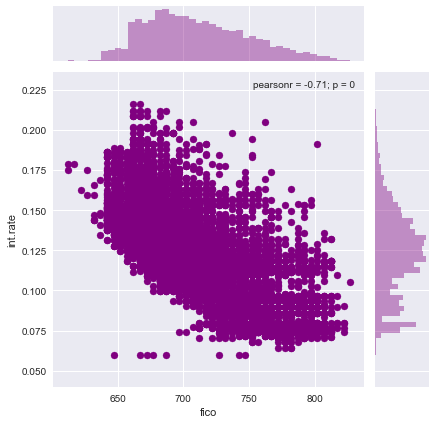

In [9]:
sns.jointplot( x= "fico", y = "int.rate", data = loans, color = "purple")

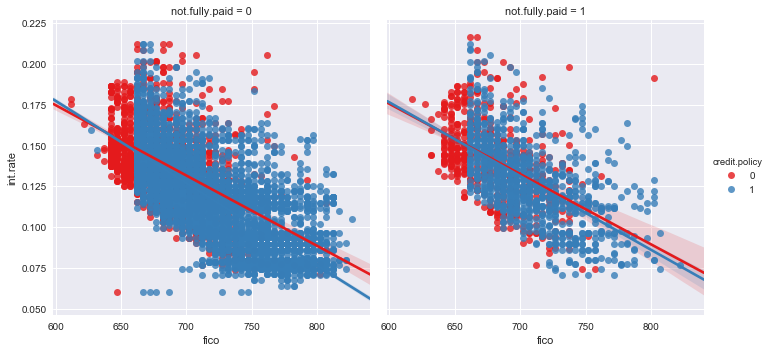

In [10]:
plt.figure(figsize = (11,7))
sns.lmplot( y = "int.rate", x = "fico", data = loans, hue = "credit.policy", col = "not.fully.paid", palette = "Set1")

#Setting up the Data

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The `purpose`column is categorical. We need to apply some transformation so sklearn would be able to understand them.

In [12]:
cat_feat = ["purpose"] #to create a list of categorical values

In [13]:
final_data = pd.get_dummies(loans, columns = cat_feat, drop_first = True)

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

#Split

In [15]:
from sklearn.model_selection import train_test_split
X = final_data.drop("not.fully.paid", axis = 1) #all features bu<t the one to predict
y = final_data["not.fully.paid"] #value to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

#Training a Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Predictions and Evaluation of Decision Tree¶
Create predictions from the test set and create a classification report and a confusion matrix.

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2394
          1       0.24      0.26      0.25       480

avg / total       0.75      0.74      0.74      2874



#Training the Random Forest model
Now its time to train our model!
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=600)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#Predictions and Evaluation
Let's predict off the y_test values and evaluate the model.
Predict the class of not.fully.paid for the X_test data.

In [25]:
predictions = rfc.predict(X_test)

Now create a classification report from the results.

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2394
          1       0.75      0.03      0.05       480

avg / total       0.82      0.84      0.77      2874



Show the Confusion Matrix for the predictions.

In [28]:
print(confusion_matrix(y_test,predictions))

[[2390    4]
 [ 468   12]]
